#1.ĐỌC DỮ LIỆU

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_columns',500)
pd.set_option('display.max_row',500)

Mounted at /content/drive


### Dataset của cta gồm 9 file csv:</br>
`customers_dataset` : thông tin khách hàng</br>
`geolocation dataset` : thông tin vị trí địa lý</br>
`order items dataset` : thông tin sản phầm được đặt</br>
`order payments dataset` : thông tin thanh toán </br>
`order reviews dataset` : thông tin đánh giá đơn đặt </br>
`orders dataset` : thông tin đơn được đặt </br>
`products dataset` : thông tin sản phẩm </br>
`sellers dataset` : thông tin ng bán </br>
`product_category_name_translation ` : bản dịch tên các loại sp </br>

In [3]:
customer = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_customers_dataset.csv')
location = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_geolocation_dataset.csv')
item = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_order_items_dataset.csv')
payment = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_order_payments_dataset.csv')
review = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_orders_dataset.csv')
product = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_products_dataset.csv')
seller = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/olist_sellers_dataset.csv')
category_name = pd.read_csv('/content/drive/My Drive/Colab Notebooks/pandas/ex/Category_product/product_category_name_translation.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


# 2.Xử Lý
Bao gồm làm sạch, loại bỏ dữ liệu dư thừa sai sót và biến đổi dữ liệu

### Trước tiên, ta cần nối các df lại với nhau để dễ dàng phân tích

In [4]:
# đưa tất cả df mới đọc được vào 1 list, sau này có thể dùng vòng lặp đọc qua từng dataframe sẽ nhanh và tự động hơn rất nhiều
dataset = [customer, location, item, payment, review, orders, product, seller, category_name]
name = ['custumer', 'location', 'item', 'payment', 'review', 'orders', 'product', 'seller', 'category_name']

In [ ]:
print(dataset[0]) #99441 row và 5 col

                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0  

In [ ]:
customer.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [5]:
dataset = [customer, location, item, payment, review, orders, product, seller, category_name]
name = ['custumer', 'location', 'item', 'payment', 'review', 'orders', 'product', 'seller', 'category_name']

data = pd.DataFrame()
data['col_category_name'] = name
#số hàng và số cột cho mỗi df trong danh sách datasets.
data['row'] = [ df.shape[0] for df in dataset ]
data['col'] = [ df.shape[1] for df in dataset]

# gtri null
data['null_value'] = [ df.isnull().sum().sum() for df in dataset ]
data ['null_col'] = [ len([col for col, null in df.isnull().sum().items() if null >0]) for df in dataset ]
data['null_col_tag_name'] = [', '.join( [col for col, null in df.isnull().sum().items() if null > 0]) for df in dataset]
data

,col_category_name,row,col,null_value,null_col,null_col_tag_name
0,custumer,99441,5,0,0,
1,location,1000163,5,0,0,
2,item,112650,7,0,0,
3,payment,103886,5,0,0,
4,review,99224,7,145903,2,"review_comment_title, review_comment_message"
5,orders,99441,8,4908,3,"order_approved_at, order_delivered_carrier_dat..."
6,product,32951,9,2448,8,"product_category_name, product_name_lenght, pr..."
7,seller,3095,4,0,0,
8,category_name,71,2,0,0,


Muốn biết cột nào null, null bao nhiêu giá trị thì nhìn vào bảng bên đưới này

**`list comprehension`**: Đây là cú pháp dùng để tạo một danh sách mới bằng cách lặp qua các phần tử của một chuỗi. Trong trường hợp này, nó tạo ra một danh sách số lượng giá trị duy nhất của từng cột.

In [6]:
def data_overview(df, sort_by= 'null_col', thresh_percent_null = 0):
  df_null = pd.DataFrame(df.isnull().sum()).reset_index()
  df_null.columns = ['column_name', 'null_col']

  #check kdl đồng thời lọc qua để lấy ra những gtri k trùng
  df_null['dtype'] = df_null['column_name'].apply(lambda x : df[x].dtype)
  df_null['unique_value'] = [ len(df[value].value_counts()) if df[value].dtype == 'object' else 0 for value in df_null['column_name'].values]

  # tính tỉ lệ % gtri null đồng thời lọc qua tỉ lệ % theo ngưỡng
  df_null_overview = df_null
  df_null_overview['percent_null'] = df_null_overview['null_col'] / len(df)
  df_null_overview.query('percent_null > @thresh_percent_null')

  # sx lại theo cột null_col
  df_null_overview = df_null_overview.sort_values(by = sort_by, ascending = False)
  df_null_overview = df_null_overview.reset_index( drop = False)

  # print(df_null_overview)
  return df_null_overview

#check
for df in dataset:
  data_overview(df)

In [8]:
dataset = [customer, location, item, payment, review, orders, product, seller, category_name]
name = ['custumer', 'location', 'item', 'payment', 'review', 'orders', 'product', 'seller', 'category_name']

df_overview = pd.DataFrame()
name_col = []
for name, df in zip ( name, dataset):
  name_col += [name] * df.shape[1]

  # sd concat nối df
  df_overview = pd.concat([ df_overview, data_overview(df)], ignore_index = False)
  df_overview['dataset_name'] = name_col  # gán tên sau mỗi lần lặp nên p để cuối

df_overview = df_overview[['dataset_name', 'column_name', 'null_col', 'percent_null', 'dtype', 'unique_value']] #sd [[]] để xác định b muốn chọn 1 tập hợp cột hay 1 cột đơn lẻ
df_overview

,dataset_name,column_name,null_col,percent_null,dtype,unique_value
0,custumer,customer_id,0,0.000000,object,99441
1,custumer,customer_unique_id,0,0.000000,object,96096
2,custumer,customer_zip_code_prefix,0,0.000000,int64,0
3,custumer,customer_city,0,0.000000,object,4119
4,custumer,customer_state,0,0.000000,object,27
0,location,geolocation_zip_code_prefix,0,0.000000,int64,0
1,location,geolocation_lat,0,0.000000,float64,0
2,location,geolocation_lng,0,0.000000,float64,0
3,location,geolocation_city,0,0.000000,object,8011
4,location,geolocation_state,0,0.000000,object,27


### Format lại những cột chứa dữ liệu ngày tháng tháng

In [ ]:
time_col_df3 = ['shipping_limit_date']
for i in time_col_df3:
  item[i] = pd.to_datetime( item[i]) #item lấy ra từ name df: olist_order_items_dataset.csv
item

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [ ]:

time_col_df5 = [ 'review_creation_date',
            'review_answer_timestamp']

for i in time_col_df5:
  review[i] = pd.to_datetime(review[i]) # dựa name olist_order_reviews_dataset.csv
review

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [9]:
time_col_df6 = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                  'order_estimated_delivery_date']
for i in time_col_df6:
  orders[i] = pd.to_datetime(orders[i]) # dựa name olist_orders_dataset.csv
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


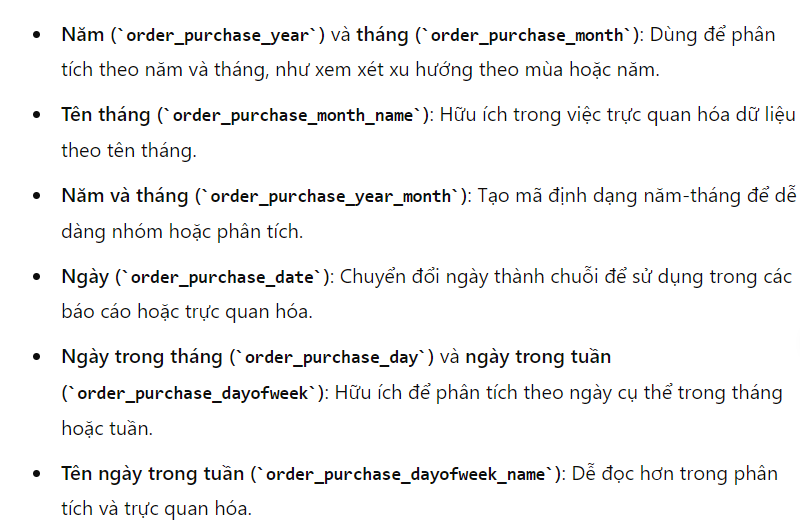

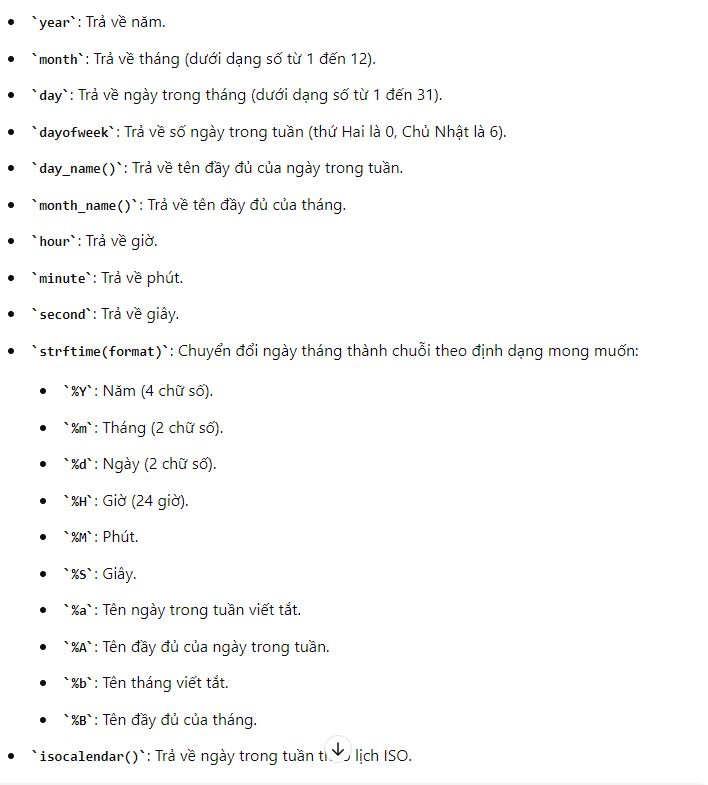

In [10]:

# lấy ra các thông tin như ngày, tháng, năm
orders['op_year'] = orders['order_purchase_timestamp'].apply(lambda x : x.year)
orders['op_month'] = orders['order_purchase_timestamp'].apply(lambda x : x.month)
orders['op_month_name'] = orders['order_purchase_timestamp'].apply(lambda x : x.strftime('%b'))
orders['op_year_month'] = orders['order_purchase_timestamp'].apply(lambda x : x.strftime('%Y%m'))
orders['op_day'] = orders['order_purchase_timestamp'].apply(lambda x : x.strftime('%d'))
orders['op_day_of_week'] = orders['order_purchase_timestamp'].apply(lambda x : x.strftime('%a'))
orders['op_hour'] = orders['order_purchase_timestamp'].apply(lambda x : x.hour)
#phân loại thời gian trong ngày thành các khoảng thời gian cụ thể.
hours_bins = [0, 6, 12, 18, 23] #các khoảng điểm
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night'] #phân loại điểm theo các khoảng đã set
orders['op_time_day'] = pd.cut(orders['op_hour'], bins = hours_bins, labels = hours_labels)
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,op_year,op_month,op_month_name,op_year_month,op_day,op_day_of_week,op_hour,op_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017,10,Oct,201710,02,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018,7,Jul,201807,24,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018,8,Aug,201808,08,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017,11,Nov,201711,18,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018,2,Feb,201802,13,Tue,21,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,2017,3,Mar,201703,09,Thu,9,Morning
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,2018,2,Feb,201802,06,Tue,12,Morning
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,2017,8,Aug,201708,27,Sun,14,Afternoon
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,2018,1,Jan,201801,08,Mon,21,Night


### 3.Phân Tích

In [ ]:
# dùng merge để nối cột
# df_order_by_status = orders.merge(customer, how= 'left', on = 'customer_id')['order_status'] # sau khi merge chỉ giữ lại cột order status
# df_cnt = df_order_by_status.value_counts()

df_cnt = customer['customer_state'].value_counts()

fig = px.bar(
    x = df_cnt.index,
    y = df_cnt.values,
    text = df_cnt.values,
    color = df_cnt.index,
    color_discrete_sequence = px.colors.sequential.Plasma,
    title = 'Customer State',
    template = 'plotly_dark'
)

fig.update_layout(
    xaxis_title = 'State',
    yaxis_title = 'Values',
    font = dict(size = 17, family = "Franklin Gothic"),
    height = 1000
)

fig.show()


In [ ]:
df_op_year_month = orders['op_year_month'].value_counts().sort_index()
# df_op_year_month
fig = px.line(
    x = df_op_year_month.index,
    y = df_op_year_month.values,
    text = df_op_year_month.values,
    title = 'No.Orders over time'
)

# chèn thêm chú thích
fig.add_annotation(x = 22.7,
    y = 16,
    text = 'decreasing orders'
)

# điều chỉnh text hiển thị trên bản đồ
fig.update_traces( textposition = 'top center',
                  textfont_size = 13,
                   texttemplate = '%{text:,}'  #định dạng số với dấu phân cách hàng nghìn
                   )


fig.update_layout(
    yaxis_title = 'count',
    xaxis_title = 'No.Orders',
    font = dict(size = 17, family = "Franklin Gothic")
)

# cập nhật labels trục x
fig.update_xaxes( tickangle = -45)
fig.show()

In [ ]:
df_op_day_of_week  = orders['op_day_of_week'].value_counts().sort_index()
fig = px.bar(
    y= df_op_day_of_week.values,
    x= df_op_day_of_week.index,
    color = df_op_day_of_week.index,
    text = df_op_day_of_week.values
)

fig.update_traces(textfont_size = 13, texttemplate = '%{text:,}')

fig.update_layout(
    xaxis_title = 'Date',
    yaxis_title = 'Count',
    title = 'No.Orders Purchase By Day Of Week',
    font = dict(size = 17, family =  "Franklin Gothic")
)

fig.show()

In [11]:
df_orders_compare = orders.query('op_year in (2017, 2018) & op_month <= 8')
orders_2017 = df_orders_compare[df_orders_compare['op_year']==2017]['op_month'].value_counts().sort_index()
orders_2018 = df_orders_compare[df_orders_compare['op_year']==2018]['op_month'].value_counts().sort_index()
growth = (orders_2018-orders_2017)/orders_2017

In [17]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

fig = go.Figure(data=[
    go.Bar(name='2017', x=months, y=orders_2017.values, textposition="inside",
           text=orders_2017.values),
    go.Bar(name='2018', x=months, y=orders_2018.values,  textposition="inside",
           text=orders_2018.values)
])
fig.update_traces(textfont_size=11,texttemplate='%{text:,}')
fig.update_layout(
    barmode='group',
    height =800,
    xaxis_title = "Month",
    yaxis_title = "count",
    template="plotly_white",
    )
fig.show()